In [69]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import Birch
from sklearn.datasets.samples_generator import make_blobs

from itertools import cycle
from time import time

In [70]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

##### 1、产生模拟数据

In [99]:
xx = np.linspace(-22, 22, 10)
yy = np.linspace(-22, 22, 10)

xx, yy = np.meshgrid(xx, yy)   # 形成100*100数据点
n_centres = np.hstack((xx.ravel().reshape(-1,1),yy.ravel().reshape(-1,1)))   # 形成10000*2网格点。这一步一般和meshgriad配合使用
                                                                             # .reshape((-1,1))可以用[:, np.newaxis]替代
X, y = make_blobs(n_samples=100000,n_features=2, centers=n_centres, random_state=28)   #10万条特征属性是2，类别是100,符合高斯分布的数据集

##### 2、构建Birch模型；设置多个Birch层次聚类参数
—— birch_models 创建不同的类直径
#threshold：类直径阈值
#branching_factor：分枝因子，允许最大叶子节点数目
#n_clusters：类别数量，给定为None为不指定数量

In [101]:
Birch_models = [
    Birch(threshold=1.7, n_clusters=None),
#     Birch(threshold=0.5, n_clusters=None),
#     Birch(threshold=1.7, n_clusters=100)   # 当给定类别数量后，在树构建完成中，会将叶子节点做合并（AGNES）
]

—— colors.cnames.keys()：颜色集

[165  46 142 ...  37   6  78]
Birch算法，参数信息为：直径=1.7;n_lusters=None；模型构建消耗时间为:2.917秒；聚类中心数目:171


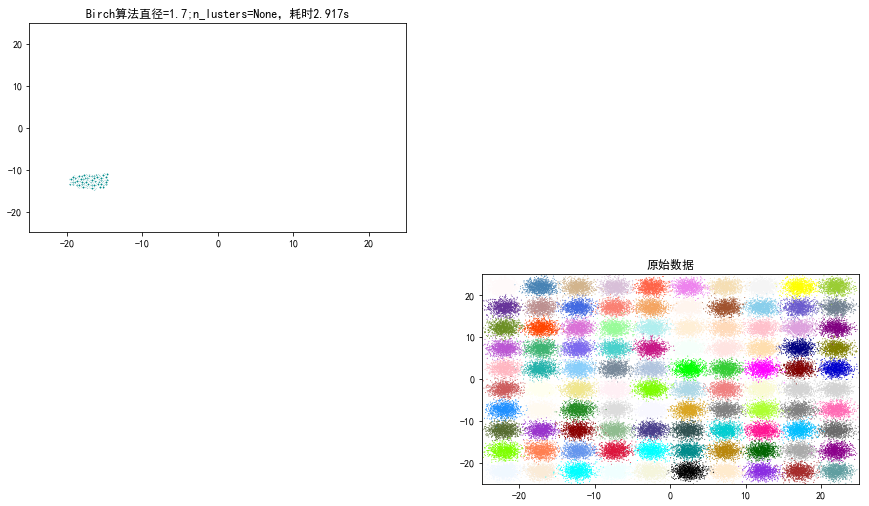

In [114]:
# birch_step = ['直径=1.7;n_lusters=None','直径=0.5;n_clusters=None','直径=1.7;n_lusters=100']  # 信息
birch_step = ['直径=1.7;n_lusters=None']

plt.figure(figsize=(12,8),facecolor='w')
plt.subplots_adjust(left = 0.02, right = 0.98, bottom = 0.1,top = 0.9)

cm = mpl.colors.ListedColormap(colors.cnames.keys())
colors_ = cycle(colors.cnames.keys())   # 循环颜色集

# 通过zip，每一次birch_model和info都会分别获得一列Birch_models和birch_step数据
# 单元组类型，不能使用元组法接收   for index, (birch_model,info) in enumerate(((Birch_models,birch_step))):
for index, (Birch_model, info) in enumerate(zip(Birch_models, birch_step)):
    
    t = time()
    Birch_model.fit(X)   # 3、模型训练
    time_ = time() - t
    
    labels = Birch_model.labels_   # 4、获取样本的分类类型（预测）
    print(labels)   # 样本的分类类别均有一个编号，0，1，2，...一直到最大值
    
    centroids = Birch_model.subcluster_centers_   # —— subcluster_centers_ 获取Birch模型中的类中心点。一般来说，只有K-Means考虑中心点
#     n_clusters = len(np.unique(centroids))   # 获取不重复特征数量；注意不是点数量
    number_cluster = len(np.unique(labels))   # 获取类别数
    print ("Birch算法，参数信息为：%s；模型构建消耗时间为:%.3f秒；聚类中心数目:%d" % (info, time_,number_cluster))
    
    plt.subplot(221 + index)   # 控制图形位置
    for this_centroid, k, col in zip(centroids, range(number_cluster), colors_):
        mask = labels == k   # 遍历类别编号（0，1，2，....），使样本预测类别与类别编号对应，依次画每一个类别所包含的点
        plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=col, marker='.')   # 输出分类类别图
        
        if Birch_model.n_clusters is None:   # 为1、2图画中心点
            plt.plot(this_centroid[0], this_centroid[1], '*', markerfacecolor=col, markeredgecolor='k', markersize=2)   # 画中心点
            
    plt.ylim([-25, 25])
    plt.xlim([-25, 25])
    plt.title('Birch算法%s，耗时%.3fs' % (info, time_))
    plt.grid(False)

# 绘制原始数据集
plt.subplot(224)
plt.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap=cm, edgecolors='none')
plt.ylim([-25, 25])
plt.xlim([-25, 25])
plt.title('原始数据')
plt.grid(False)
    
plt.show()

In [66]:
X = np.array([[1,2],[1,3]])
print(len(X))
print(len(np.unique(X)))

2
3


In [105]:
m = np.array([1,2])
for i in range(0,5):
    n = m == i
    print(n)


[False False]
[ True False]
[False  True]
[False False]
[False False]
